# 머신러닝 모델링 테스트

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df_1=pd.read_csv('lnglat.csv')
df_2=pd.read_csv('charger.csv')

In [5]:
display(df_1.head(2),df_2.head(2))

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역
0,126.298_33.319,126.298,33.319,제주특별자치도 제주시 한림읍
1,126.299_33.319,126.299,33.319,제주특별자치도 제주시 한림읍


,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime,lat,lng,count
0,남원읍 공영주차장,50130.0,B0,B001,N,N,NaN,6,24시간 이용가능,33.278877,126.721314,1
1,위미의례회관,50130.0,A0,A004,N,N,NaN,6,24시간 이용가능,33.289615,126.657626,1


In [10]:
df_2['lat']=df_2['lat'].astype(str).str[:6]
df_2['lng']=df_2['lng'].astype(str).str[:7]
df_2['경도_Lng-위도_Lat']=df_2['lng'].str[:7]+'_'+df_2['lat'].str[:6]

In [12]:
df_2.head(2)

,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime,lat,lng,count,경도_Lng-위도_Lat
0,남원읍 공영주차장,50130.0,B0,B001,N,N,NaN,6,24시간 이용가능,33.278,126.721,1,126.721_33.278
1,위미의례회관,50130.0,A0,A004,N,N,NaN,6,24시간 이용가능,33.289,126.657,1,126.657_33.289


In [31]:
df_3=pd.merge(df_1,df_2,how='outer',left_on='경도_Lng-위도_Lat',right_on='경도_Lng-위도_Lat')

In [61]:
df_3.shape

(97693, 16)

In [62]:
df_3_1=df_3[np.logical_and(df_3['lat'].notnull(),df_3['행정구역'].notnull())]

In [76]:
df_3_1=df_3_1.drop(['lat','lng'],axis=1)

In [71]:
df_3_2=df_3[df_3['lat'].isna()]

In [74]:
df_3_2=df_3_2.drop(['lat','lng'],axis=1)

In [77]:
df_3_3=df_3[df_3['행정구역'].isna()]

In [79]:
df_3_3['경도_Lng']=df_3_3['lng']
df_3_3['위도_Lat']=df_3_3['lat']
df_3_3=df_3_3.drop(['lat','lng'],axis=1)

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_15332\1882957352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_3['경도_Lng']=df_3_3['lng']
C:\Users\ggyo0\AppData\Local\Temp\ipykernel_15332\1882957352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_3['위도_Lat']=df_3_3['lat']


In [84]:
df_final=pd.concat([df_3_1,df_3_2,df_3_3])
df_final.duplicated().sum()

3

In [85]:
df_final=df_final.drop_duplicates()

In [89]:
df_final=df_final.reset_index().drop(['index'],axis=1)

In [90]:
df_final.shape

(97690, 14)

In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97690 entries, 0 to 97689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   경도_Lng-위도_Lat  97690 non-null  object 
 1   경도_Lng         97690 non-null  object 
 2   위도_Lat         97690 non-null  object 
 3   행정구역           97306 non-null  object 
 4   statNm         1064 non-null   object 
 5   zscode         1056 non-null   float64
 6   kind           1064 non-null   object 
 7   kindDetail     1064 non-null   object 
 8   parkingFree    1064 non-null   object 
 9   limitYn        1064 non-null   object 
 10  limitDetail    102 non-null    object 
 11  chgerType      1064 non-null   float64
 12  useTime        1057 non-null   object 
 13  count          1064 non-null   float64
dtypes: float64(3), object(11)
memory usage: 10.4+ MB


In [92]:
df_final.describe(include='all')

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime,count
count,97690,97690.000,97690.000,97306,1064,1056.000000,1064,1064,1064,1064,102,1064.000000,1057,1064.000000
unique,97578,1099.000,657.000,14,997,NaN,10,48,2,2,26,NaN,23,NaN
top,126.425_33.241,126.519,33.312,제주특별자치도 서귀포시,제주월드컵경기장,NaN,A0,G004,Y,N,시설 상황에 따라 이용이 제한될 수 있음,NaN,24시간 이용가능,NaN
freq,4,269.000,695.000,21975,6,NaN,231,140,919,981,52,NaN,895,NaN
mean,NaN,NaN,NaN,NaN,NaN,50117.348485,NaN,NaN,NaN,NaN,NaN,5.378759,NaN,1.988722
std,NaN,NaN,NaN,NaN,NaN,9.646636,NaN,NaN,NaN,NaN,NaN,0.870959,NaN,1.981539
min,NaN,NaN,NaN,NaN,NaN,50110.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,50110.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,50110.000000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,50130.000000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,2.000000


In [100]:
ch=[]
for cnt in df_final['count']:
    if cnt>0:
        ch.append('T')
    else:
        ch.append('F')
df_final['충전소 설치 유무']=ch

In [103]:
df_final[df_final['충전소 설치 유무']=='F']

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime,count,충전소 설치 유무
680,126.298_33.319,126.298,33.319,제주특별자치도 제주시 한림읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
681,126.299_33.319,126.299,33.319,제주특별자치도 제주시 한림읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
682,126.300_33.319,126.3,33.319,제주특별자치도 제주시 한림읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
683,126.294_33.320,126.294,33.32,제주특별자치도 제주시 한림읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
684,126.295_33.320,126.295,33.32,제주특별자치도 제주시 한림읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97301,126.541_33.361,126.541,33.361,제주특별자치도 서귀포시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
97302,126.542_33.361,126.542,33.361,제주특별자치도 서귀포시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
97303,126.543_33.361,126.543,33.361,제주특별자치도 서귀포시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
97304,126.544_33.361,126.544,33.361,제주특별자치도 서귀포시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F


In [104]:
df_final.to_csv('final_temp.csv',index=None)

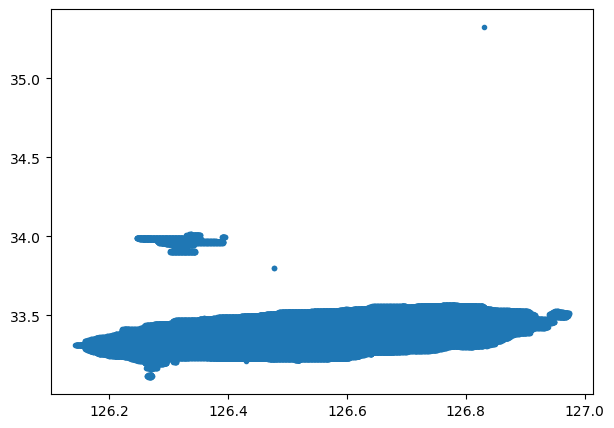

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df_final=pd.read_csv('final_temp.csv')
plt.figure(figsize=(7,5))
plt.plot(df_final['경도_Lng'].astype(float),df_final['위도_Lat'].astype(float),'o',markersize=3)

# plt.boxplot(df_final['위도_Lat'].astype(float))

In [11]:
df_final[df_final['위도_Lat']==df_final['위도_Lat'].max()]

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역,statNm,zscode,kind,kindDetail,parkingFree,limitYn,limitDetail,chgerType,useTime,count,충전소 설치 유무
97663,126.831_35.326,126.831,35.326,NaN,표선공영주차장,50130.0,B0,B001,Y,N,NaN,4.0,24시간 이용가능,3.0,T
